In [76]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

#### matplotlib kor problem

In [17]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.0
설치 위치:  /Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /Users/tax_k/.matplotlib
캐시 위치:  /Users/tax_k/.matplotlib


In [18]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  /Users/tax_k/.matplotlib/matplotlibrc


In [49]:
font_location = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
fm.FontProperties(fname=font_location)
mpl.rc('font', family=font_name)

NanumGothic


In [50]:
# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXFontDirectories
print((font_list_mac))

['/Library/Fonts/', '/Network/Library/Fonts/', '/System/Library/Fonts/', '/opt/local/share/fonts', '', '/Users/tax_k/Library/Fonts']


In [29]:
# path = '/Library/Fonts/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=path, size=18)

In [234]:
path = ''
state_ts = pd.read_csv(path+'merged_addr_gangnam.csv',parse_dates=['full_deal_date'])
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (62555, 67)


### gangnam in - out 

In [235]:
data_xls = pd.read_excel('gangnam_inout.xls',index_col=None, header=None)
data_xls.to_csv('gangnam_inout.csv', encoding='utf-8')

In [236]:
in_out_df = pd.read_csv(path+'gangnam_inout.csv')
print('Number of rows and columns in state ts:',in_out_df.shape)

Number of rows and columns in state ts: (4, 155)


#### drop header title

In [237]:
in_out_df = in_out_df.drop(in_out_df.index[[1,2]])

In [238]:
in_out_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,0,행정구역(시군구)별,2006. 01,2006. 02,2006. 03,2006. 04,2006. 05,2006. 06,2006. 07,2006. 08,...,2017. 12,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,2018. 09
3,3,강남구,2527,6452,1715,259,514,289,609,904,...,-1657,-721,-867,-1913,-1944,-2555,-1916,-1270,-847,-961


#### drop gu title

In [239]:
in_out_df_T = in_out_df.T
in_out_df_T = in_out_df_T.drop(in_out_df_T.index[[0,1]])
in_out_df_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 2 columns):
0    153 non-null object
3    153 non-null object
dtypes: object(2)
memory usage: 3.6+ KB


In [240]:
in_out_df_T = in_out_df_T.rename(index=int, columns={0: "full_date", 3: "in_out_count"})

print(list(in_out_df_T.columns.values))

['full_date', 'in_out_count']


#### Transpose and drop full_date

In [241]:
in_out_df_T.loc[:, 'full_date'] = in_out_df_T.full_date.str.replace(" ", '')
in_out_df_T.loc[:, 'year'] = in_out_df_T.full_date.str.split(".").str[0]
in_out_df_T.loc[:, 'month'] = in_out_df_T.full_date.str.split(".").str[1]

in_out_df_T = in_out_df_T.drop(['full_date'], axis=1)

In [242]:
## Data Description
def describe(df):
    print('======================================')
    print('No. of Rows.:{0}\nNo. of Columns:{1}\n'.format(df.shape[0], df.shape[1]))
    print('======================================')
    data_type = DataFrame(df.dtypes, columns=['Data Type'])
    null_count =  DataFrame(df.isnull().sum(), columns=['Null Count'])
    not_null_count = DataFrame(df.notnull().sum(), columns=['Not Null Count'])
    unique_count = DataFrame(df.nunique(), columns=['Unique Count'])
    joined = data_type.merge(null_count, left_index=True, right_index=True)
    joined = joined.merge(not_null_count, left_index=True, right_index=True)
    joined = joined.merge(unique_count, left_index=True, right_index=True)
    display(joined)
    display(df.describe())
    return None

In [243]:
state_ts[:][state_ts["loc_code_x"] == 11680]

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_Oil,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas
0,24.463,0.345,8.450,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,17.968,0.284,5.100,2005,2006,역삼동,역삼래미안,1,1,59.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,18.008,0.278,5.000,2005,2006,역삼동,역삼래미안,1,1,59.530,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,24.463,0.343,8.400,2005,2006,역삼동,역삼래미안,1,11,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,18.008,0.288,5.180,2005,2006,역삼동,역삼래미안,1,21,59.530,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,24.463,0.331,8.100,2005,2006,역삼동,역삼래미안,2,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,24.463,0.382,9.340,2005,2006,역삼동,역삼래미안,2,11,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,17.968,0.314,5.650,2005,2006,역삼동,역삼래미안,2,11,59.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [244]:
state_ts.head()

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_Oil,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas
0,24.463,0.345,8.450,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,17.968,0.284,5.100,2005,2006,역삼동,역삼래미안,1,1,59.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,18.008,0.278,5.000,2005,2006,역삼동,역삼래미안,1,1,59.530,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


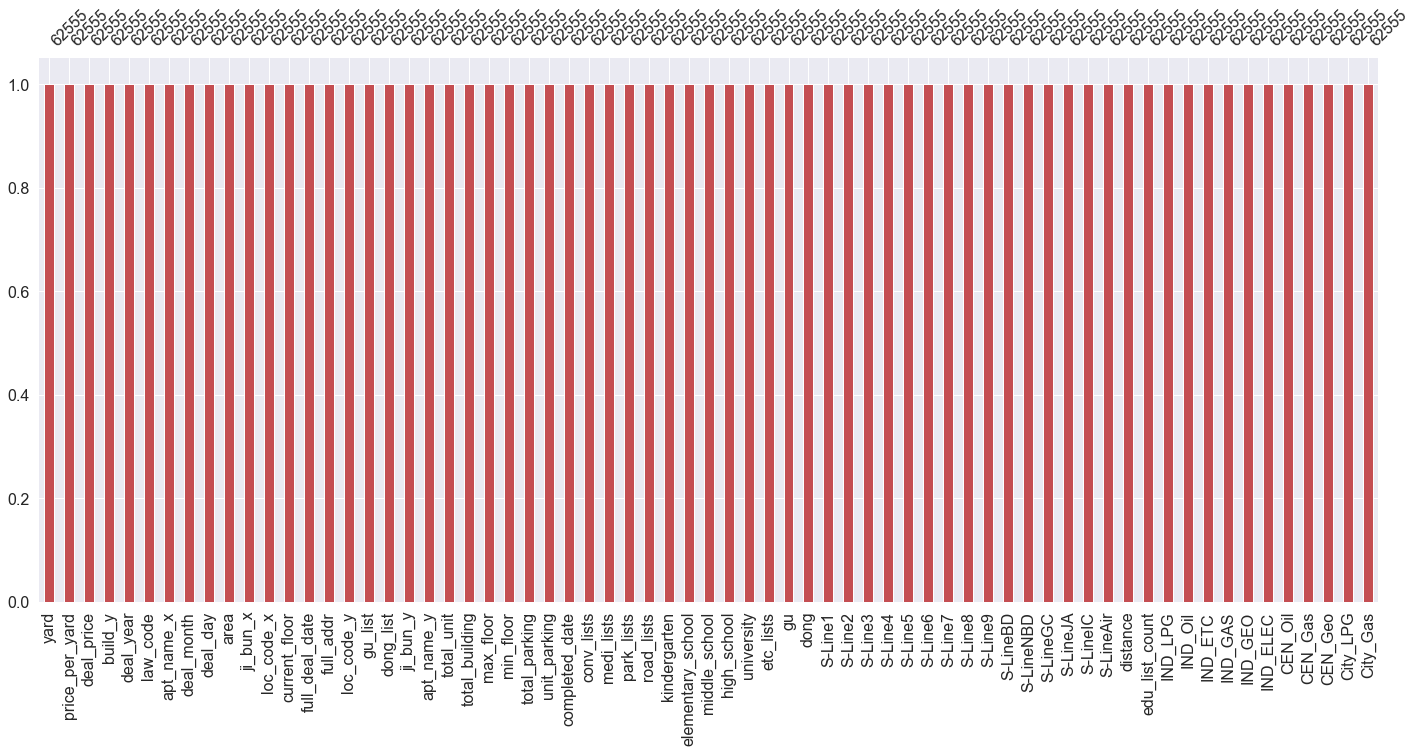

In [245]:
msno.bar(state_ts,color='r')

In [246]:
# Analysis
print('Date range:{} to {}'.format(state_ts['full_deal_date'].min(),state_ts['full_deal_date'].max()))
print('Number of States',state_ts['law_code'].nunique())

Date range:2006-01-01 00:00:00 to 2018-10-11 00:00:00
Number of States 13


In [247]:
state_month = state_ts.resample('M',on='full_deal_date').mean()
state_month = state_month.reset_index()
state_month.shape

(154, 59)

In [248]:
# Sample data by region name
state_vise = state_ts.groupby(['law_code']).mean()
state_vise.shape

(13, 58)

In [249]:
describe(state_ts)

No. of Rows.:62555
No. of Columns:67



,Data Type,Null Count,Not Null Count,Unique Count
yard,float64,0,62555,2067
price_per_yard,float64,0,62555,34079
deal_price,float64,0,62555,2888
build_y,int64,0,62555,43
deal_year,int64,0,62555,13
law_code,object,0,62555,13
apt_name_x,object,0,62555,564
deal_month,int64,0,62555,12
deal_day,int64,0,62555,3
area,float64,0,62555,2067


,yard,price_per_yard,deal_price,build_y,deal_year,deal_month,deal_day,area,loc_code_x,current_floor,...,IND_Oil,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas
count,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,...,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000
mean,25.948,0.370,9.744,1994.406,2012.389,6.343,11.315,85.778,11680.000,8.604,...,0.000,0.000,0.360,0.006,0.000,0.000,0.053,0.039,0.000,0.015
std,12.642,0.133,6.311,10.146,3.820,3.428,8.137,41.793,0.000,6.629,...,0.000,0.000,0.480,0.075,0.000,0.000,0.224,0.194,0.000,0.122
min,3.660,0.010,0.100,1974.000,2006.000,1.000,1.000,12.100,11680.000,-1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,16.580,0.277,5.500,1984.000,2009.000,3.000,1.000,54.810,11680.000,4.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,25.516,0.355,8.250,1994.000,2013.000,6.000,11.000,84.349,11680.000,7.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,33.133,0.445,12.500,2004.000,2016.000,9.000,21.000,109.530,11680.000,12.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,128.357,1.447,64.000,2017.000,2018.000,12.000,21.000,424.320,11680.000,68.000,...,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000


In [250]:
state_ts.describe()

,yard,price_per_yard,deal_price,build_y,deal_year,deal_month,deal_day,area,loc_code_x,current_floor,...,IND_Oil,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas
count,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,...,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000
mean,25.948,0.370,9.744,1994.406,2012.389,6.343,11.315,85.778,11680.000,8.604,...,0.000,0.000,0.360,0.006,0.000,0.000,0.053,0.039,0.000,0.015
std,12.642,0.133,6.311,10.146,3.820,3.428,8.137,41.793,0.000,6.629,...,0.000,0.000,0.480,0.075,0.000,0.000,0.224,0.194,0.000,0.122
min,3.660,0.010,0.100,1974.000,2006.000,1.000,1.000,12.100,11680.000,-1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,16.580,0.277,5.500,1984.000,2009.000,3.000,1.000,54.810,11680.000,4.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,25.516,0.355,8.250,1994.000,2013.000,6.000,11.000,84.349,11680.000,7.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,33.133,0.445,12.500,2004.000,2016.000,9.000,21.000,109.530,11680.000,12.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,128.357,1.447,64.000,2017.000,2018.000,12.000,21.000,424.320,11680.000,68.000,...,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000


In [251]:
state_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62555 entries, 0 to 62554
Data columns (total 67 columns):
yard                 62555 non-null float64
price_per_yard       62555 non-null float64
deal_price           62555 non-null float64
build_y              62555 non-null int64
deal_year            62555 non-null int64
law_code             62555 non-null object
apt_name_x           62555 non-null object
deal_month           62555 non-null int64
deal_day             62555 non-null int64
area                 62555 non-null float64
ji_bun_x             62555 non-null object
loc_code_x           62555 non-null int64
current_floor        62555 non-null int64
full_deal_date       62555 non-null datetime64[ns]
full_addr            62555 non-null object
loc_code_y           62555 non-null int64
gu_list              62555 non-null object
dong_list            62555 non-null object
ji_bun_y             62555 non-null object
apt_name_y           62555 non-null object
total_unit           62555

In [252]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [254]:
state_ts.loc[:, 'nml_bldg_age'] = state_ts['deal_year'] - state_ts['build_y']

### 1000만원? 64억??

In [255]:
state_ts.sort_values(["price_per_yard"], ascending=[False]).head(10)

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,nml_bldg_age
4238,10.851,1.447,15.700,1982,2018,개포동,개포주공 4단지,8,21,35.870,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,36
4237,15.243,1.246,19.000,1982,2018,개포동,개포주공 4단지,8,21,50.390,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,36
4236,15.243,1.243,18.950,1982,2018,개포동,개포주공 4단지,8,1,50.390,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,36
4234,12.702,1.181,15.000,1982,2018,개포동,개포주공 4단지,7,11,41.990,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,36
4233,12.871,1.165,15.000,1982,2018,개포동,개포주공 4단지,3,21,42.550,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,36
4235,12.702,1.142,14.500,1982,2018,개포동,개포주공 4단지,7,21,41.990,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,36
60405,15.010,1.119,16.800,2011,2018,청담동,청담자이,8,21,49.619,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7
60404,15.010,1.119,16.800,2011,2018,청담동,청담자이,8,1,49.619,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7
60407,15.002,1.097,16.450,2011,2018,청담동,청담자이,9,11,49.593,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7
62166,18.147,1.075,19.500,2015,2018,대치동,래미안대치팰리스,8,21,59.990,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3


In [256]:
state_ts.sort_values(["deal_price"], ascending=[False]).head(10)

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,nml_bldg_age
59146,74.106,0.864,64.000,2003,2018,청담동,상지카일룸,6,21,244.980,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15
52427,59.105,1.049,62.000,2004,2018,삼성동,아이파크,8,11,195.388,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14
52430,59.105,1.015,60.000,2004,2018,삼성동,아이파크,9,11,195.388,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14
59414,73.907,0.798,59.000,2006,2018,청담동,상지리츠빌카일룸2차,6,11,244.320,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12
59412,73.907,0.792,58.500,2006,2018,청담동,상지리츠빌카일룸2차,2,11,244.320,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12
59409,73.907,0.771,57.000,2006,2014,청담동,상지리츠빌카일룸2차,3,21,244.320,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8
59411,73.907,0.771,57.000,2006,2017,청담동,상지리츠빌카일룸2차,12,21,244.320,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11
52241,59.105,0.964,57.000,2004,2008,삼성동,아이파크,4,11,195.388,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4
52264,59.105,0.953,56.300,2004,2009,삼성동,아이파크,12,21,195.388,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5
59413,73.907,0.744,55.000,2006,2018,청담동,상지리츠빌카일룸2차,3,1,244.320,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12


In [257]:
state_ts.sort_values(["deal_price"], ascending=[False]).tail(10)

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,nml_bldg_age
4753,12.260,0.057,0.700,1984,2011,개포동,시영,3,21,40.530,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27
47130,10.828,0.061,0.665,2003,2011,대치동,대우아이빌멤버스(891-26),5,21,35.796,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8
53462,9.214,0.065,0.600,2003,2011,대치동,아름빌(889-74),6,1,30.460,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8
27802,10.978,0.046,0.500,2004,2009,논현동,마일스디오빌,8,11,36.290,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5
4788,8.709,0.057,0.500,1984,2011,개포동,시영,11,1,28.790,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27
52123,34.246,0.015,0.500,2006,2011,청담동,청담2차e-편한세상,11,21,113.210,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5
18090,23.172,0.017,0.400,1990,2007,대치동,선경3차,4,21,76.600,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,17
53942,19.702,0.020,0.400,2003,2006,신사동,한양,8,21,65.130,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3
56017,25.673,0.012,0.300,2003,2009,신사동,압구정화이트빌,9,1,84.870,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6
37776,10.418,0.010,0.100,1993,2011,수서동,까치마을,5,11,34.440,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18


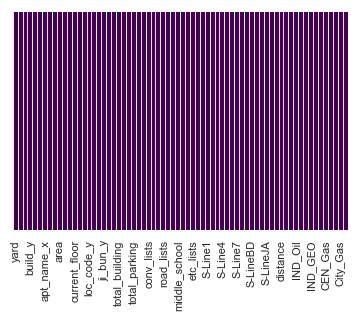

In [258]:
sns.heatmap(state_ts.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

In [259]:
state_ts.isnull().values.any()

False

In [260]:
state_ts['nml_bldg_age'].value_counts()

14    2476
11    2401
10    2328
9     2241
23    2157
12    2142
8     2072
4     2012
13    1934
7     1924
5     1922
22    1792
15    1791
30    1767
3     1761
24    1744
25    1735
6     1734
17    1656
32    1621
31    1618
33    1586
26    1559
16    1529
27    1452
21    1408
18    1376
29    1346
19    1306
34    1303
28    1214
2     1211
20    1111
1      989
35     975
38     688
37     665
36     654
0      482
39     403
40     247
41     175
42      43
43       4
44       1
Name: nml_bldg_age, dtype: int64

In [261]:
state_ts['law_code'].value_counts()

개포동     11486
대치동     10446
도곡동      8387
역삼동      7113
삼성동      5306
압구정동     4731
수서동      3743
청담동      3470
일원동      3425
논현동      2841
세곡동       738
신사동       715
자곡동       154
Name: law_code, dtype: int64

## Merge in_out + full data

In [262]:
in_out_df_T.head()

,in_out_count,year,month
1,2527,2006,01
2,6452,2006,02
3,1715,2006,03
4,259,2006,04
5,514,2006,05


In [267]:
state_ts.loc[:, "deal_month"] = state_ts.deal_month.astype(str)
state_ts.loc[:, "deal_year"] = state_ts.deal_year.astype(str)

In [265]:
state_ts.loc[:, "deal_month"] = state_ts.deal_month.apply(lambda x: x.zfill(2))

In [268]:
state_ts.head()

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,nml_bldg_age
0,24.463,0.345,8.450,2005,2006,역삼동,역삼래미안,01,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
1,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,01,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
2,17.968,0.284,5.100,2005,2006,역삼동,역삼래미안,01,1,59.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
3,18.008,0.278,5.000,2005,2006,역삼동,역삼래미안,01,1,59.530,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
4,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,01,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1


In [270]:
in_out_merged_df = pd.merge(state_ts, in_out_df_T, left_on=["deal_year", "deal_month"], right_on=["year", "month"],how="left")

In [274]:
in_out_merged_df = in_out_merged_df.drop(['year', 'month'], axis=1)

In [314]:
in_out_merged_df.head()

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,nml_bldg_age,in_out_count
0,24.463,0.345,8.450,2005,2006,역삼동,역삼래미안,01,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2527
1,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,01,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2527
2,17.968,0.284,5.100,2005,2006,역삼동,역삼래미안,01,1,59.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2527
3,18.008,0.278,5.000,2005,2006,역삼동,역삼래미안,01,1,59.530,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2527
4,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,01,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,2527


In [333]:
get_search_pd(df_name=in_out_merged_df, col_name="apt_name_x", keyword="역삼래미안")

    yard  price_per_yard  deal_price  build_y deal_year law_code apt_name_x  \
0 24.463           0.345       8.450     2005      2006      역삼동      역삼래미안   
1 24.463           0.307       7.500     2005      2006      역삼동      역삼래미안   
2 17.968           0.284       5.100     2005      2006      역삼동      역삼래미안   
3 18.008           0.278       5.000     2005      2006      역삼동      역삼래미안   
4 24.463           0.307       7.500     2005      2006      역삼동      역삼래미안   

  deal_month  deal_day   area     ...      S-LineBD  S-LineNBD  S-LineGC  \
0         01         1 80.870     ...         1.000      0.000         0   
1         01         1 80.870     ...         1.000      0.000         0   
2         01         1 59.400     ...         1.000      0.000         0   
3         01         1 59.530     ...         1.000      0.000         0   
4         01         1 80.870     ...         1.000      0.000         0   

  S-LineJA S-LineIC  S-LineAir distance edu_list_count nml_bldg_age 

### Remove GAS/GEO info

In [317]:
df_col_lists = list(in_out_merged_df.columns.values)
df_col_lists

['yard',
 'price_per_yard',
 'deal_price',
 'build_y',
 'deal_year',
 'law_code',
 'apt_name_x',
 'deal_month',
 'deal_day',
 'area',
 'ji_bun_x',
 'loc_code_x',
 'current_floor',
 'full_deal_date',
 'full_addr',
 'loc_code_y',
 'gu_list',
 'dong_list',
 'ji_bun_y',
 'apt_name_y',
 'total_unit',
 'total_building',
 'max_floor',
 'min_floor',
 'total_parking',
 'unit_parking',
 'completed_date',
 'conv_lists',
 'medi_lists',
 'park_lists',
 'road_lists',
 'kindergarten',
 'elementary_school',
 'middle_school',
 'high_school',
 'university',
 'etc_lists',
 'gu',
 'dong',
 'S-Line1',
 'S-Line2',
 'S-Line3',
 'S-Line4',
 'S-Line5',
 'S-Line6',
 'S-Line7',
 'S-Line8',
 'S-Line9',
 'S-LineBD',
 'S-LineNBD',
 'S-LineGC',
 'S-LineJA',
 'S-LineIC',
 'S-LineAir',
 'distance',
 'edu_list_count',
 'IND_LPG',
 'IND_Oil',
 'IND_ETC',
 'IND_GAS',
 'IND_GEO',
 'IND_ELEC',
 'CEN_Oil',
 'CEN_Gas',
 'CEN_Geo',
 'City_LPG',
 'City_Gas',
 'nml_bldg_age',
 'in_out_count']

In [320]:
in_out_merged_df = in_out_merged_df.drop(['IND_LPG','IND_Oil','IND_ETC','IND_GAS','IND_GEO','IND_ELEC','CEN_Oil','CEN_Gas','CEN_Geo','City_LPG','City_Gas'], axis=1)

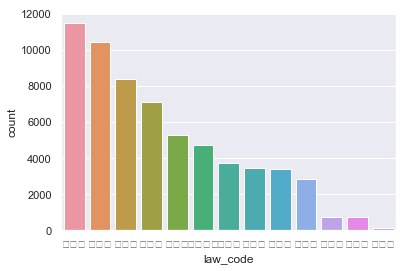

In [277]:
sns.countplot(state_ts.law_code, order = state_ts['law_code'].value_counts().index)

No handles with labels found to put in legend.
/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



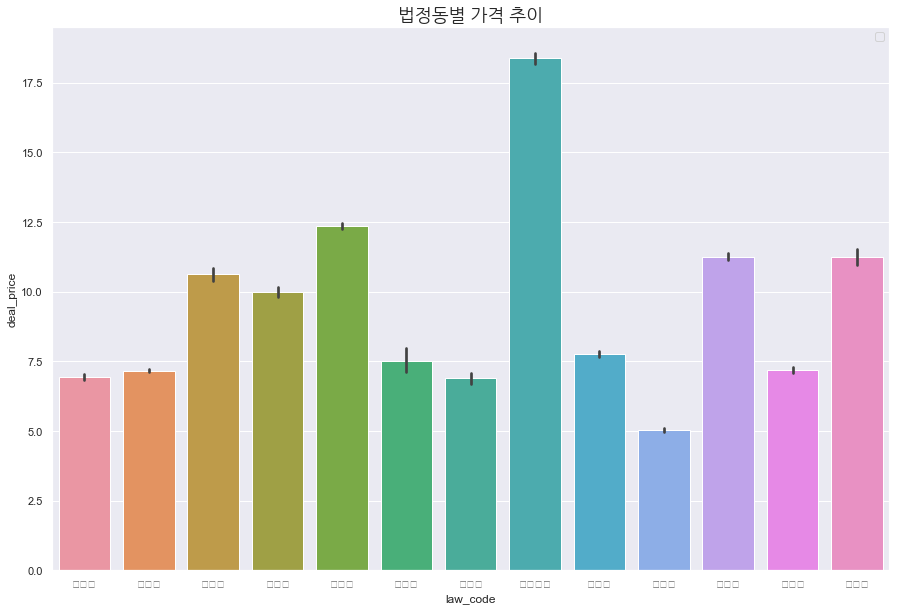

In [278]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('법정동별 가격 추이', fontproperties=fontprop)
plt.xlabel('dong')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='law_code', y='deal_price', data = state_ts)

In [279]:
statelist = state_ts['law_code'].unique()

In [280]:
statelist = list(statelist)
print(len(statelist))

13


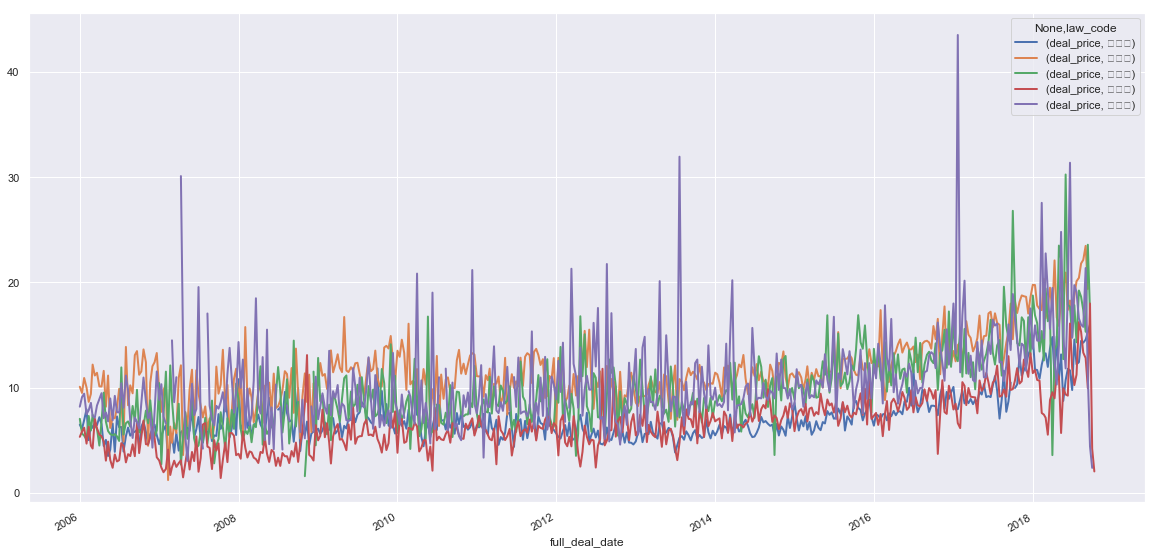

In [307]:
stateseries = pd.DataFrame(state_ts[(state_ts['law_code'].\
    isin(statelist[:5]))][['full_deal_date','law_code','deal_price']].\
    dropna().\
    groupby(['full_deal_date', 'law_code'])['law_code','deal_price'].mean().unstack())
stateseries.plot(figsize=(20,10), linewidth=2)
plt.show()

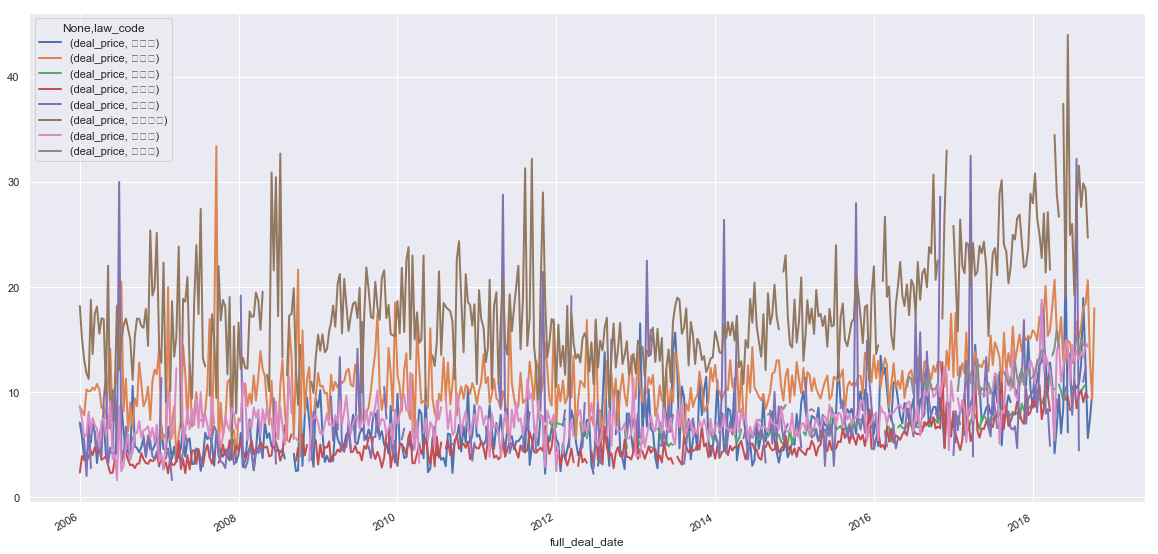

In [308]:
stateseries = pd.DataFrame(state_ts[(state_ts['law_code'].\
    isin(statelist[5:]))][['full_deal_date','law_code','deal_price']].\
    dropna().\
    groupby(['full_deal_date', 'law_code'])['law_code','deal_price'].mean().unstack())
stateseries.plot(figsize=(20,10), linewidth=2)
plt.show()

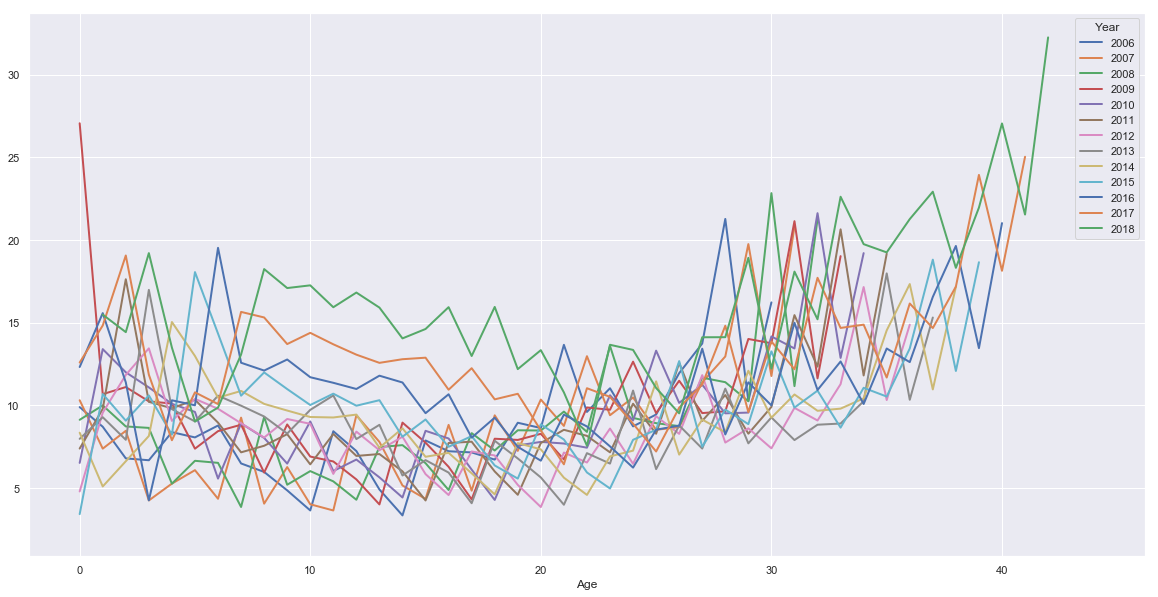

In [313]:
%matplotlib inline
sns.set()
season = state_ts
season['Date'] = state_ts.full_deal_date
season['Year'] = state_ts['full_deal_date'].dt.year
season['Month'] = state_ts['full_deal_date'].dt.month
season['Day'] = state_ts['full_deal_date'].dt.day
season['Age'] = state_ts['nml_bldg_age']
spivot = pd.pivot_table(season, index='Age', columns = 'Year', values = 'deal_price', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=2)
plt.show()

### In - Out timeseries chart

      2006.01 ~ 2018.09 까지 강남구 전/출입 신고
      
      지수(순 이동 수) = 전입신고 - 전출신고
      
      지수가 뒤로 갈수록 음수이다 -> 서울에서 벗어나는 사람들이 많다.

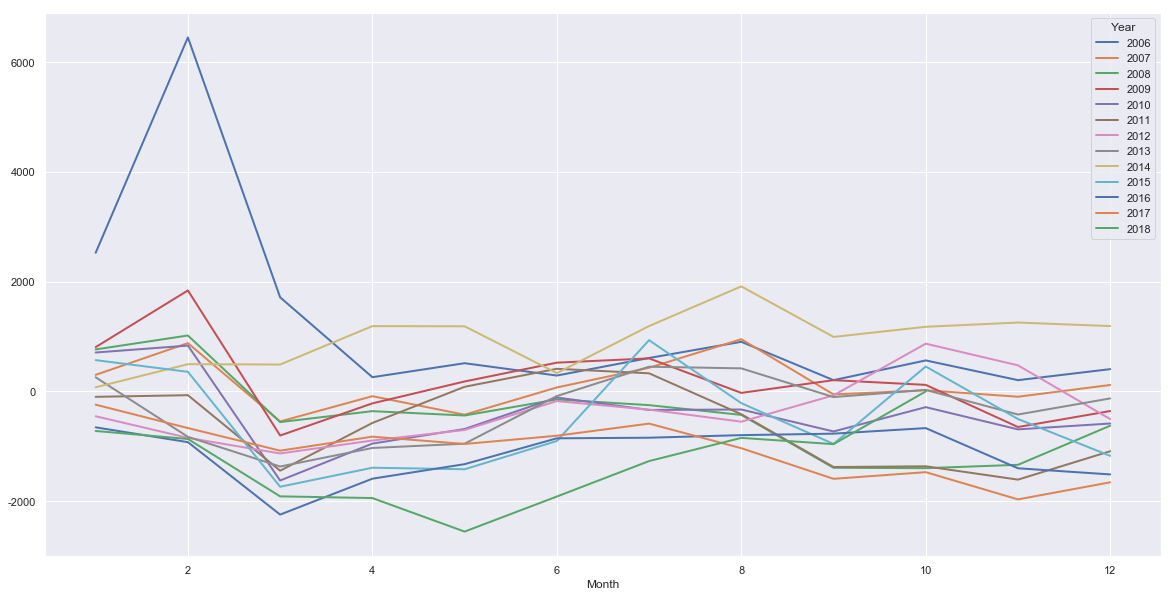

In [337]:
%matplotlib inline
sns.set()
season = in_out_merged_df
season['Date'] = in_out_merged_df.full_deal_date
season['Year'] = in_out_merged_df['full_deal_date'].dt.year
season['Month'] = in_out_merged_df['full_deal_date'].dt.month
season['Day'] = in_out_merged_df['full_deal_date'].dt.day
season['Age'] = in_out_merged_df['nml_bldg_age']
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'in_out_count', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=2)
plt.show()

## Correlation & Hitmap Vis

In [301]:
cond = in_out_merged_df['in_out_count'].isnull()
column_name = 'in_out_count'
in_out_merged_df.loc[cond, column_name] = "0"

In [302]:
in_out_merged_df.in_out_count.isnull().sum()

0

In [303]:
in_out_merged_df[:][in_out_merged_df["in_out_count"].isnull()]

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,nml_bldg_age,in_out_count


In [321]:
in_out_merged_df.loc[:, column_name] = in_out_merged_df.in_out_count.astype(int)

In [322]:
in_out_merged_df.corr()

,yard,price_per_yard,deal_price,build_y,deal_day,area,loc_code_x,current_floor,loc_code_y,total_unit,...,S-LineBD,S-LineNBD,S-LineGC,S-LineJA,S-LineIC,S-LineAir,distance,edu_list_count,nml_bldg_age,in_out_count
yard,1.000,0.086,0.813,-0.029,0.008,1.000,nan,0.131,nan,-0.193,...,-0.078,-0.024,nan,nan,nan,nan,0.036,-0.011,0.069,-0.041
price_per_yard,0.086,1.000,0.576,-0.264,0.013,0.086,nan,0.073,nan,0.377,...,0.176,-0.198,nan,nan,nan,nan,-0.064,0.171,0.400,-0.262
deal_price,0.813,0.576,1.000,-0.155,0.013,0.813,nan,0.196,nan,0.023,...,0.010,-0.122,nan,nan,nan,nan,-0.050,0.089,0.246,-0.157
build_y,-0.029,-0.264,-0.155,1.000,-0.002,-0.029,nan,0.249,nan,-0.323,...,-0.066,0.102,nan,nan,nan,nan,0.049,0.152,-0.932,-0.044
deal_day,0.008,0.013,0.013,-0.002,1.000,0.008,nan,-0.005,nan,-0.003,...,-0.002,0.005,nan,nan,nan,nan,-0.003,0.003,0.003,-0.001
area,1.000,0.086,0.813,-0.029,0.008,1.000,nan,0.131,nan,-0.193,...,-0.078,-0.024,nan,nan,nan,nan,0.036,-0.011,0.069,-0.041
loc_code_x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
current_floor,0.131,0.073,0.196,0.249,-0.005,0.131,nan,1.000,nan,-0.019,...,0.114,-0.031,nan,nan,nan,nan,-0.077,0.200,-0.226,-0.014
loc_code_y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_unit,-0.193,0.377,0.023,-0.323,-0.003,-0.193,nan,-0.019,nan,1.000,...,0.253,-0.134,nan,nan,nan,nan,-0.131,0.112,0.319,-0.021


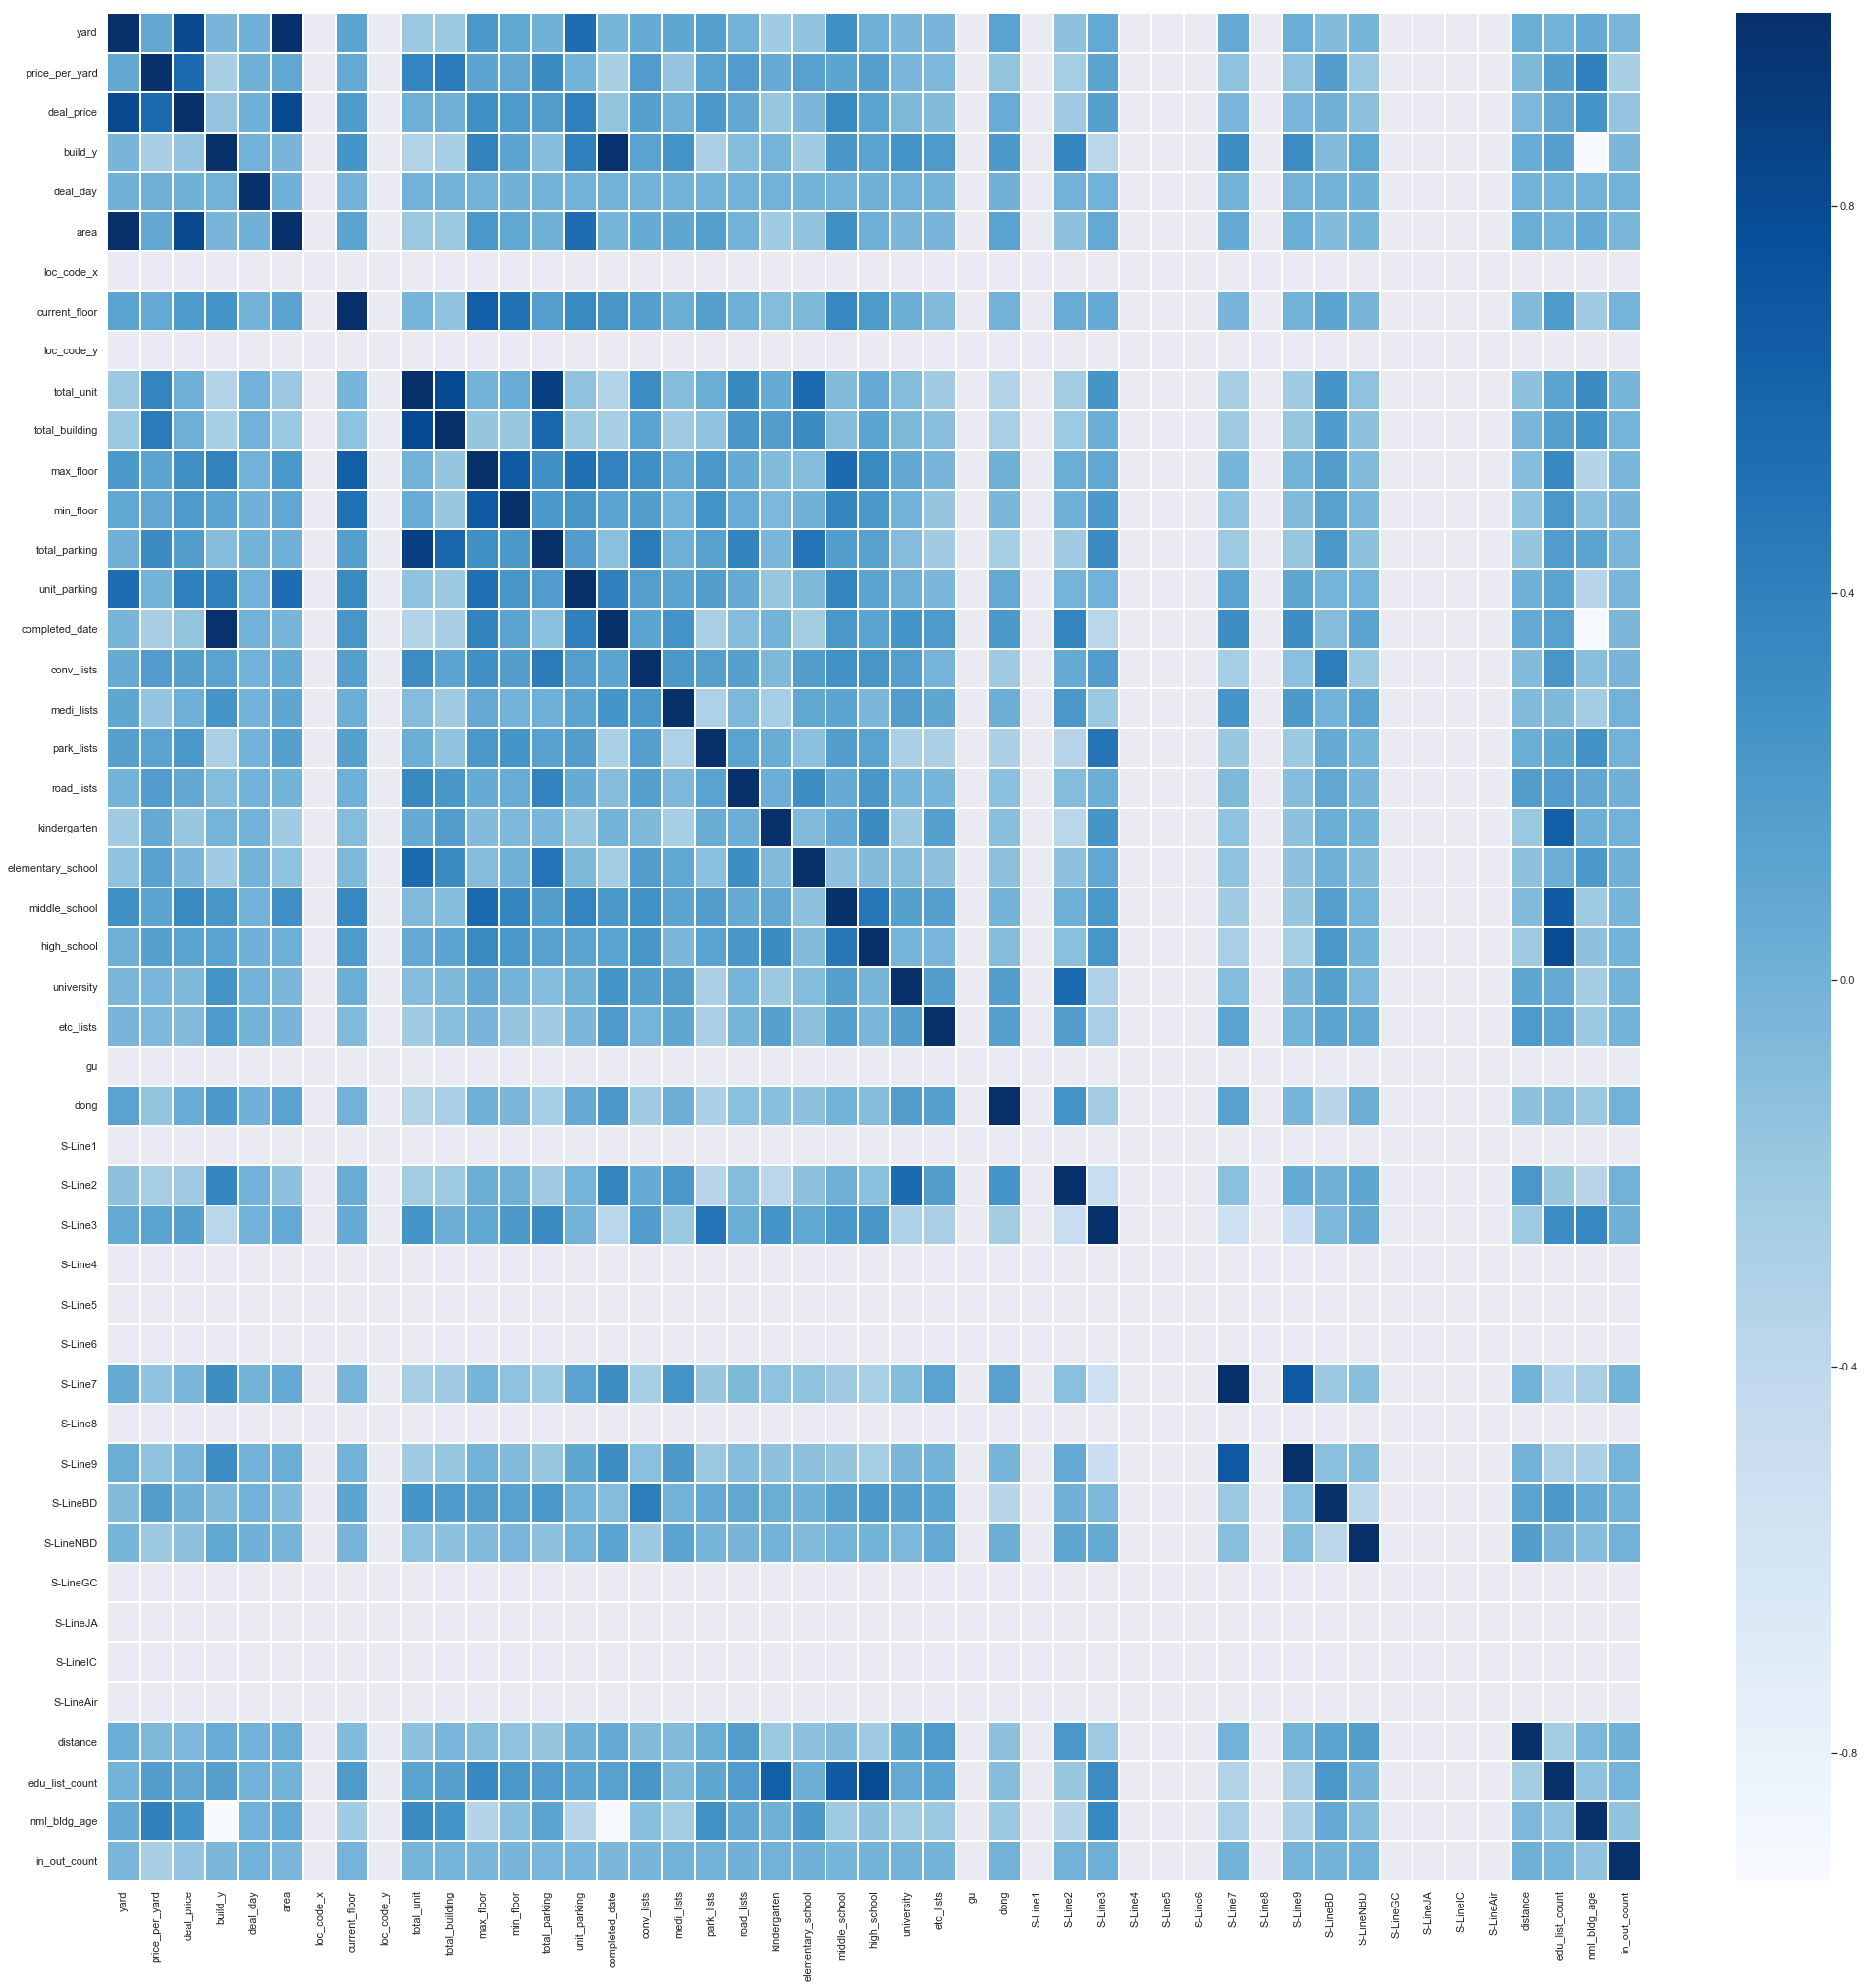

In [323]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=in_out_merged_df.corr(), annot=False, fmt='.2f', linewidths='1', cmap='Blues')

In [332]:
def get_search_pd(df_name, col_name, keyword):
    result = df_name.loc[:][df_name[col_name] == keyword]
    
    print(result.head())